In [1]:
### Import Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [155]:
### Data path
path="~/UTS/36104 DVN/DVN_AT3/data/" #/Users/stefan/UTS/36104 DVN/DVN_AT3/data

In [156]:
# join 1 and 2 then merge
df1 = pd.read_csv(path+"winequality-red.csv")
df2 = pd.read_csv(path+"winemag-data-130k-v2.csv")
df3 = pd.read_csv(path+"winemag-data_first150k.csv")

In [157]:
# clean reviews
key_features = ['country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery']

df2_clean = df2[key_features]
df3_clean = df3[key_features]

df_rev = df2_clean.append(df3_clean)
top_wine_df = df_rev[df_rev['points'] >= 95]

KeyboardInterrupt: 

In [ ]:
top_wine_df.info()

In [ ]:
df_rev.info()

In [ ]:
print(df1.info())
df1.describe()

In [ ]:
print(df2.info())
df2.tail()

In [ ]:
print(df3.info())
df3.tail()

In [ ]:
### Points v. price

# Make Scatter plot
fig, ax=plt.subplots(figsize = (12,6))
ax.scatter(df_rev["points"], df_rev["price"], color='b')
ax.set_xlabel('points')
ax.set_ylabel('price')
plt.title('points v. price')
#ax.set_xlim([-1, 10.5])
#ax.set_ylim([0, 100])
plt.show()

In [ ]:
#Make boxplot distribution 
fig, ax = plt.subplots(figsize = (12,6))
sns.boxplot(y="price", x="points", data=df_rev)
ax.set_xlabel('points')
ax.set_ylabel('price')
ax.set_title('points v. price')
plt.show()

In [ ]:
#Make boxplot distribution 
fig, ax = plt.subplots(figsize = (12,6))
sns.boxplot(y="points", x="country", data=df_rev)
ax.set_xlabel('country')
ax.set_ylabel('points')
ax.set_title('country v. points')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
#Make boxplot distribution 
fig, ax = plt.subplots(figsize = (12,6))
sns.boxplot(y="price", x="country", data=df_rev)
ax.set_xlabel('country')
ax.set_ylabel('price')
ax.set_title('country v. price')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
### Points >= 95

#Make boxplot distribution 
fig, ax = plt.subplots(figsize = (18,9))
sns.boxplot(y="points", x="variety", data=top_wine_df)
ax.set_xlabel('variety')
ax.set_ylabel('points')
ax.set_title('Points >= 95: variety v. points')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
### Points >= 95

#Make boxplot distribution 
fig, ax = plt.subplots(figsize = (18,9))
sns.boxplot(y="price", x="variety", data=top_wine_df)
ax.set_xlabel('variety')
ax.set_ylabel('price')
ax.set_title('Points >= 95: variety v. price')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [ ]:
# Sunburst plot with plotly

fig = px.sunburst(top_wine_df, path=['country', 'variety'], values='points', color='country',
                 title="Sunburst plot of points>=95/100 across country and variety", width=1200, height=600)
fig.show()

## Wordcloud

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors", "palate", "finish","hint", "whiff", "offer","note"])

In [ ]:
# df_rev = df2_clean.append(df3_clean) # dataset for all reviews
# top_wine_df = df_rev[df_rev['points'] >= 95] # data for reviews >95

#### Wordcloud for 95 +

In [ ]:
top_text = " ".join(review for review in top_wine_df.description)
print ("There are {} words.".format(len(top_text)))

In [ ]:
top_wordcloud = WordCloud(stopwords=stopwords,
                          background_color="white",
                          width=800,
                          height=400,
                          
                         ).generate(text)

plt.imshow(top_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
top_wordcloud.to_file("/Users/stefan/UTS/36104 DVN/DVN_AT3/output/top.png")

#### Wordcloud for all

In [ ]:
text = " ".join(review for review in df_rev.description)
print ("There are {} words.".format(len(text)))

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white",
                      width=800,
                      height=400,
                     ).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#not sure why this is so similar to the 95 + wordcloud. wouldve expected a difference

In [ ]:
wordcloud.to_file("/Users/stefan/UTS/36104 DVN/DVN_AT3/output/all.png")

#### France

In [ ]:
fra = " ".join(review for review in df_rev[df_rev["country"]=="France"].description)
print ("There are {} words.".format(len(fra)))

In [ ]:
wordcloud_fra = WordCloud(stopwords=stopwords, background_color="white").generate(fra)

plt.imshow(wordcloud_fra, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud_fra.to_file("/Users/stefan/UTS/36104 DVN/DVN_AT3/output/fra.png")

#### France Top

In [ ]:
top_fra = " ".join(review for review in top_wine_df[top_wine_df["country"]=="France"].description)
print ("There are {} words.".format(len(top_fra)))

In [ ]:
wordcloud_top_fra = WordCloud(stopwords=stopwords, background_color="white").generate(top_fra)

plt.imshow(wordcloud_top_fra, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud_top_fra.to_file("/Users/stefan/UTS/36104 DVN/DVN_AT3/output/fra_top.png")

#### Italy

In [ ]:
ita = " ".join(review for review in df_rev[df_rev["country"]=="Italy"].description)
print ("There are {} words.".format(len(ita)))

In [ ]:
wordcloud_ita = WordCloud(stopwords=stopwords, background_color="white").generate(ita)

plt.imshow(wordcloud_ita, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud_ita.to_file("/Users/stefan/UTS/36104 DVN/DVN_AT3/output/ita.png")

#### Italy Top

In [ ]:
top_ita = " ".join(review for review in top_wine_df[top_wine_df["country"]=="Italy"].description)
print ("There are {} words.".format(len(top_ita)))

In [ ]:
wordcloud_top_ita = WordCloud(stopwords=stopwords, background_color="white").generate(top_ita)

plt.imshow(wordcloud_top_ita, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud_top_ita.to_file("/Users/stefan/UTS/36104 DVN/DVN_AT3/output/ita_top.png")

#### Australia

In [ ]:
aus = " ".join(review for review in df_rev[df_rev["country"]=="Australia"].description)
print ("There are {} words.".format(len(aus)))

In [ ]:
wordcloud_aus = WordCloud(stopwords=stopwords, background_color="white").generate(aus)

plt.imshow(wordcloud_aus, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud_aus.to_file("/Users/stefan/UTS/36104 DVN/DVN_AT3/output/aus.png")

#### Australia Top

In [ ]:
top_aus = " ".join(review for review in top_wine_df[top_wine_df["country"]=="Australia"].description)
print ("There are {} words.".format(len(top_aus)))

In [ ]:
wordcloud_top_aus = WordCloud(stopwords=stopwords, background_color="white").generate(top_aus)

plt.imshow(wordcloud_top_aus, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud_top_aus.to_file("/Users/stefan/UTS/36104 DVN/DVN_AT3/output/aus_top.png")

#### Switzerland

In [ ]:
ch = " ".join(review for review in df_rev[df_rev["country"]=="Switzerland"].description)
print ("There are {} words.".format(len(ch)))

In [ ]:
wordcloud_ch = WordCloud(stopwords=stopwords, background_color="white").generate(ch)

plt.imshow(wordcloud_ch, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud_ch.to_file("/Users/stefan/UTS/36104 DVN/DVN_AT3/output/ch.png")

#### Swiss Top

In [ ]:
top_ch = " ".join(review for review in top_wine_df[top_wine_df["country"]=="Switzerland"].description)
print ("There are {} words.".format(len(top_ch)))

#### USA

In [ ]:
usa = " ".join(review for review in df_rev[df_rev["country"]=="US"].description)
print ("There are {} words.".format(len(usa)))

In [ ]:
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white").generate(usa)

plt.imshow(wordcloud_usa, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud_usa.to_file("/Users/stefan/UTS/36104 DVN/DVN_AT3/output/usa.png")

#### USA Top

In [ ]:
top_usa = " ".join(review for review in top_wine_df[top_wine_df["country"]=="US"].description)
print ("There are {} words.".format(len(top_usa)))

In [ ]:
wordcloud_top_usa = WordCloud(stopwords=stopwords, background_color="white").generate(top_usa)

plt.imshow(wordcloud_top_usa, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud_top_usa.to_file("/Users/stefan/UTS/36104 DVN/DVN_AT3/output/usa_top.png")

#### Spain

In [158]:
esp = " ".join(review for review in df_rev[df_rev["country"]=="Spain"].description)
print ("There are {} words.".format(len(esp)))

There are 3913937 words.


There are 47329 words.


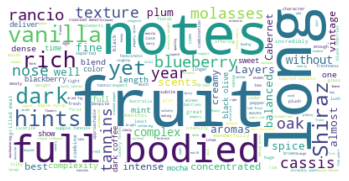

In [159]:
wordcloud_esp = WordCloud(stopwords=stopwords, background_color="white").generate(esp)

plt.imshow(wordcloud_esp, interpolation='bilinear')
plt.axis("off")#### Australia Top

top_aus = " ".join(review for review in top_wine_df[top_wine_df["country"]=="Australia"].description)
print ("There are {} words.".format(len(top_aus)))

wordcloud_top_aus = WordCloud(stopwords=stopwords, background_color="white").generate(top_aus)

plt.imshow(wordcloud_top_aus, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.show()

In [160]:
wordcloud_esp.to_file("/Users/stefan/UTS/36104 DVN/DVN_AT3/output/esp.png")

#### Spain Top

In [161]:
top_esp = " ".join(review for review in top_wine_df[top_wine_df["country"]=="Spain"].description)
print ("There are {} words.".format(len(top_esp)))

There are 49872 words.


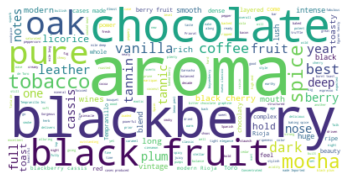

In [162]:
wordcloud_top_esp = WordCloud(stopwords=stopwords, background_color="white").generate(top_esp)

plt.imshow(wordcloud_top_esp, interpolation='bilinear')
plt.axis("off")
plt.show()

In [163]:
wordcloud_top_esp.to_file("/Users/stefan/UTS/36104 DVN/DVN_AT3/output/esp_top.png")

#### Portugal

In [164]:
por = " ".join(review for review in df_rev[df_rev["country"]=="Portugal"].description)
print ("There are {} words.".format(len(por)))

There are 2341098 words.


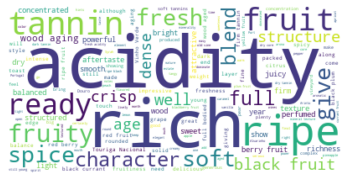

In [165]:
wordcloud_por = WordCloud(stopwords=stopwords, background_color="white").generate(por)

plt.imshow(wordcloud_por, interpolation='bilinear')
plt.axis("off")
plt.show()

In [166]:
wordcloud_por.to_file("/Users/stefan/UTS/36104 DVN/DVN_AT3/output/por.png")

#### Portugal Top

In [167]:
top_por = " ".join(review for review in top_wine_df[top_wine_df["country"]=="Portugal"].description)
print ("There are {} words.".format(len(top_por)))

There are 47768 words.


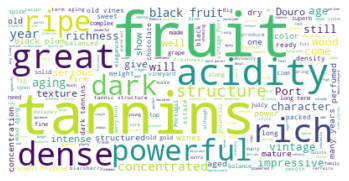

In [168]:
wordcloud_top_por = WordCloud(stopwords=stopwords, background_color="white").generate(top_por)

plt.imshow(wordcloud_top_por, interpolation='bilinear',)
plt.axis("off")
plt.show()

In [169]:
wordcloud_top_por.to_file("/Users/stefan/UTS/36104 DVN/DVN_AT3/output/por_top.png")

### Only Adjectives

In [170]:
# from textblob import TextBlob

# https://stackoverflow.com/questions/56980515/how-to-extract-all-adjectives-from-a-strings-of-text-in-a-pandas-dataframe

# To be looked into